Train Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619 entries, 0 to 2618
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      2619 non-null   object
 1   Port Number                    2619 non-null   object
 2   Received Packets               2619 non-null   int64 
 3   Received Bytes                 2619 non-null   int64 
 4   Sent Bytes                     2619 non-null   int64 
 5   Sent Packets                   2619 non-null   int64 
 6   Port alive Duration (S)        2619 non-null   int64 
 7   Delta Received Packets         2619 non-null   int64 
 8   Delta Received Bytes           2619 non-null   int64 
 9   Delta Sent Bytes               2619 non-null   int64 
 10  Delta Sent Packets             2619 non-null   int64 
 11  Delta Port alive Duration (S)  2619 non-null   int64 
 12  Connection Point               2619 non-null   

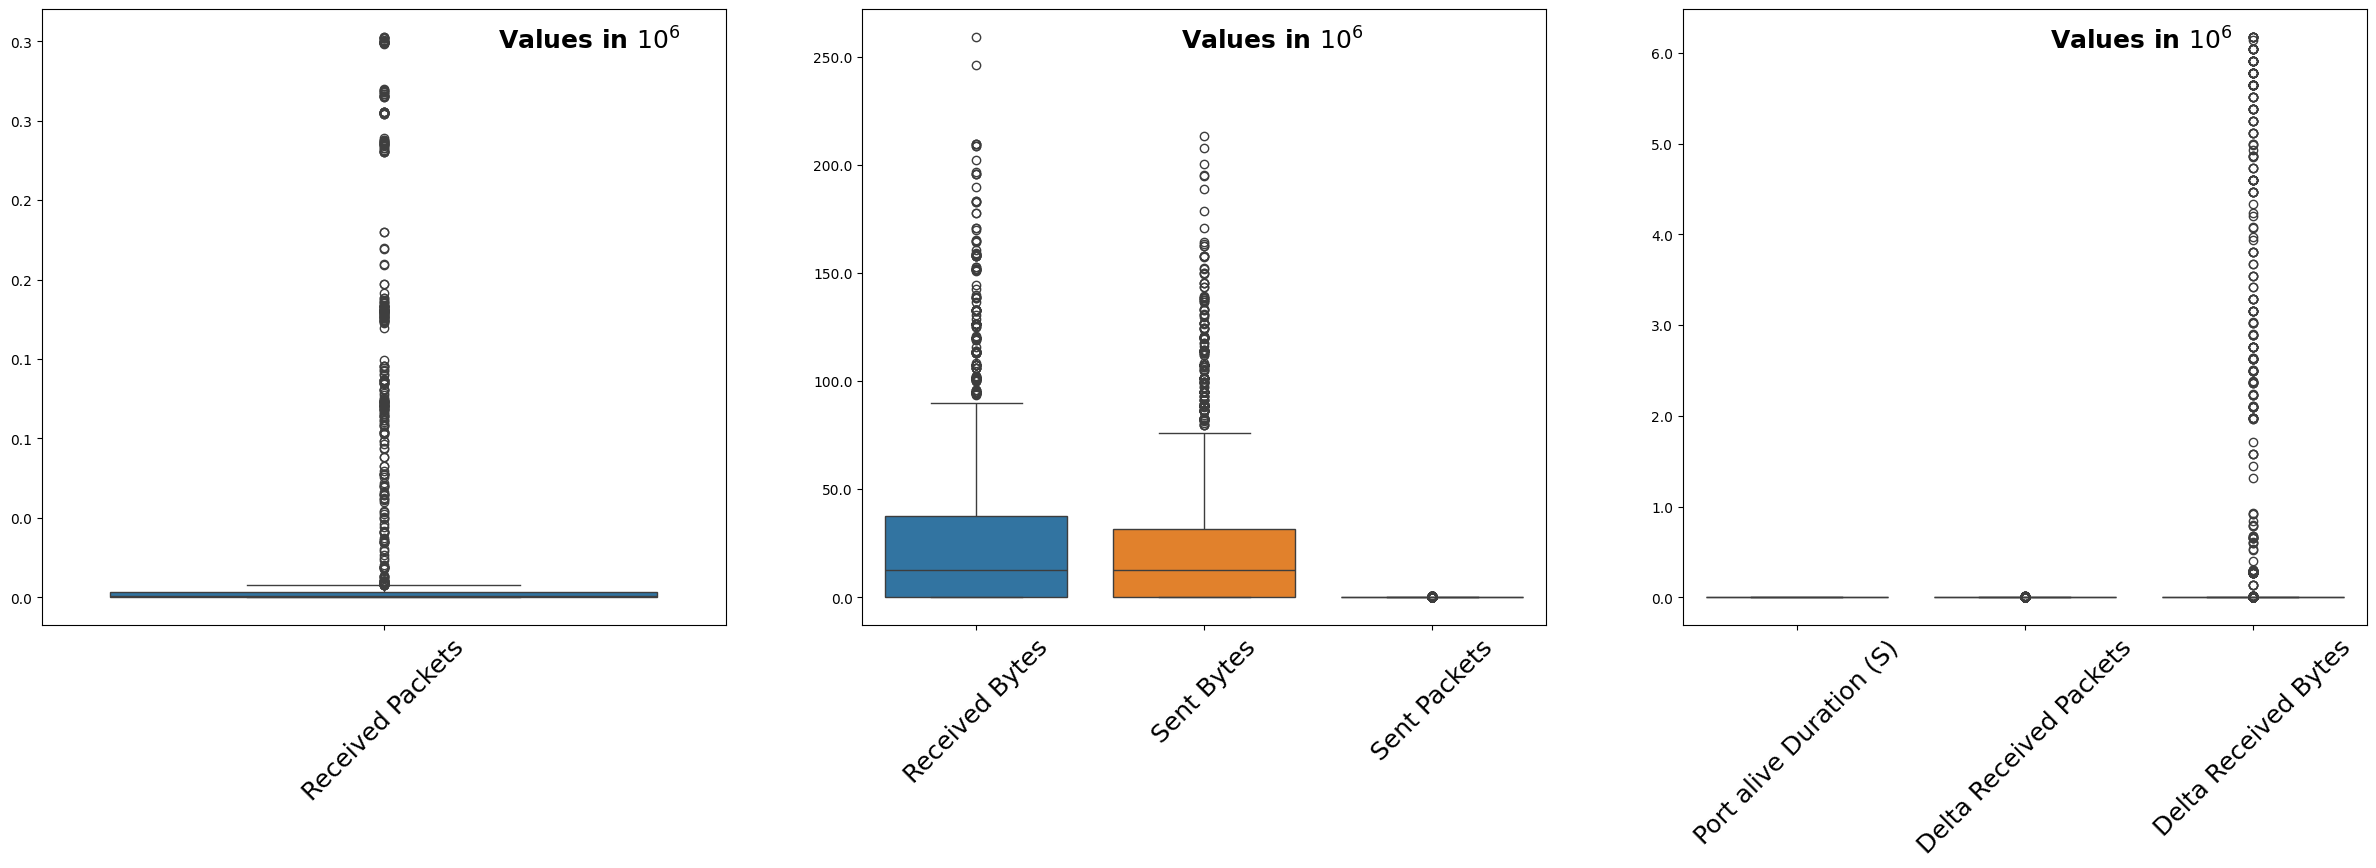

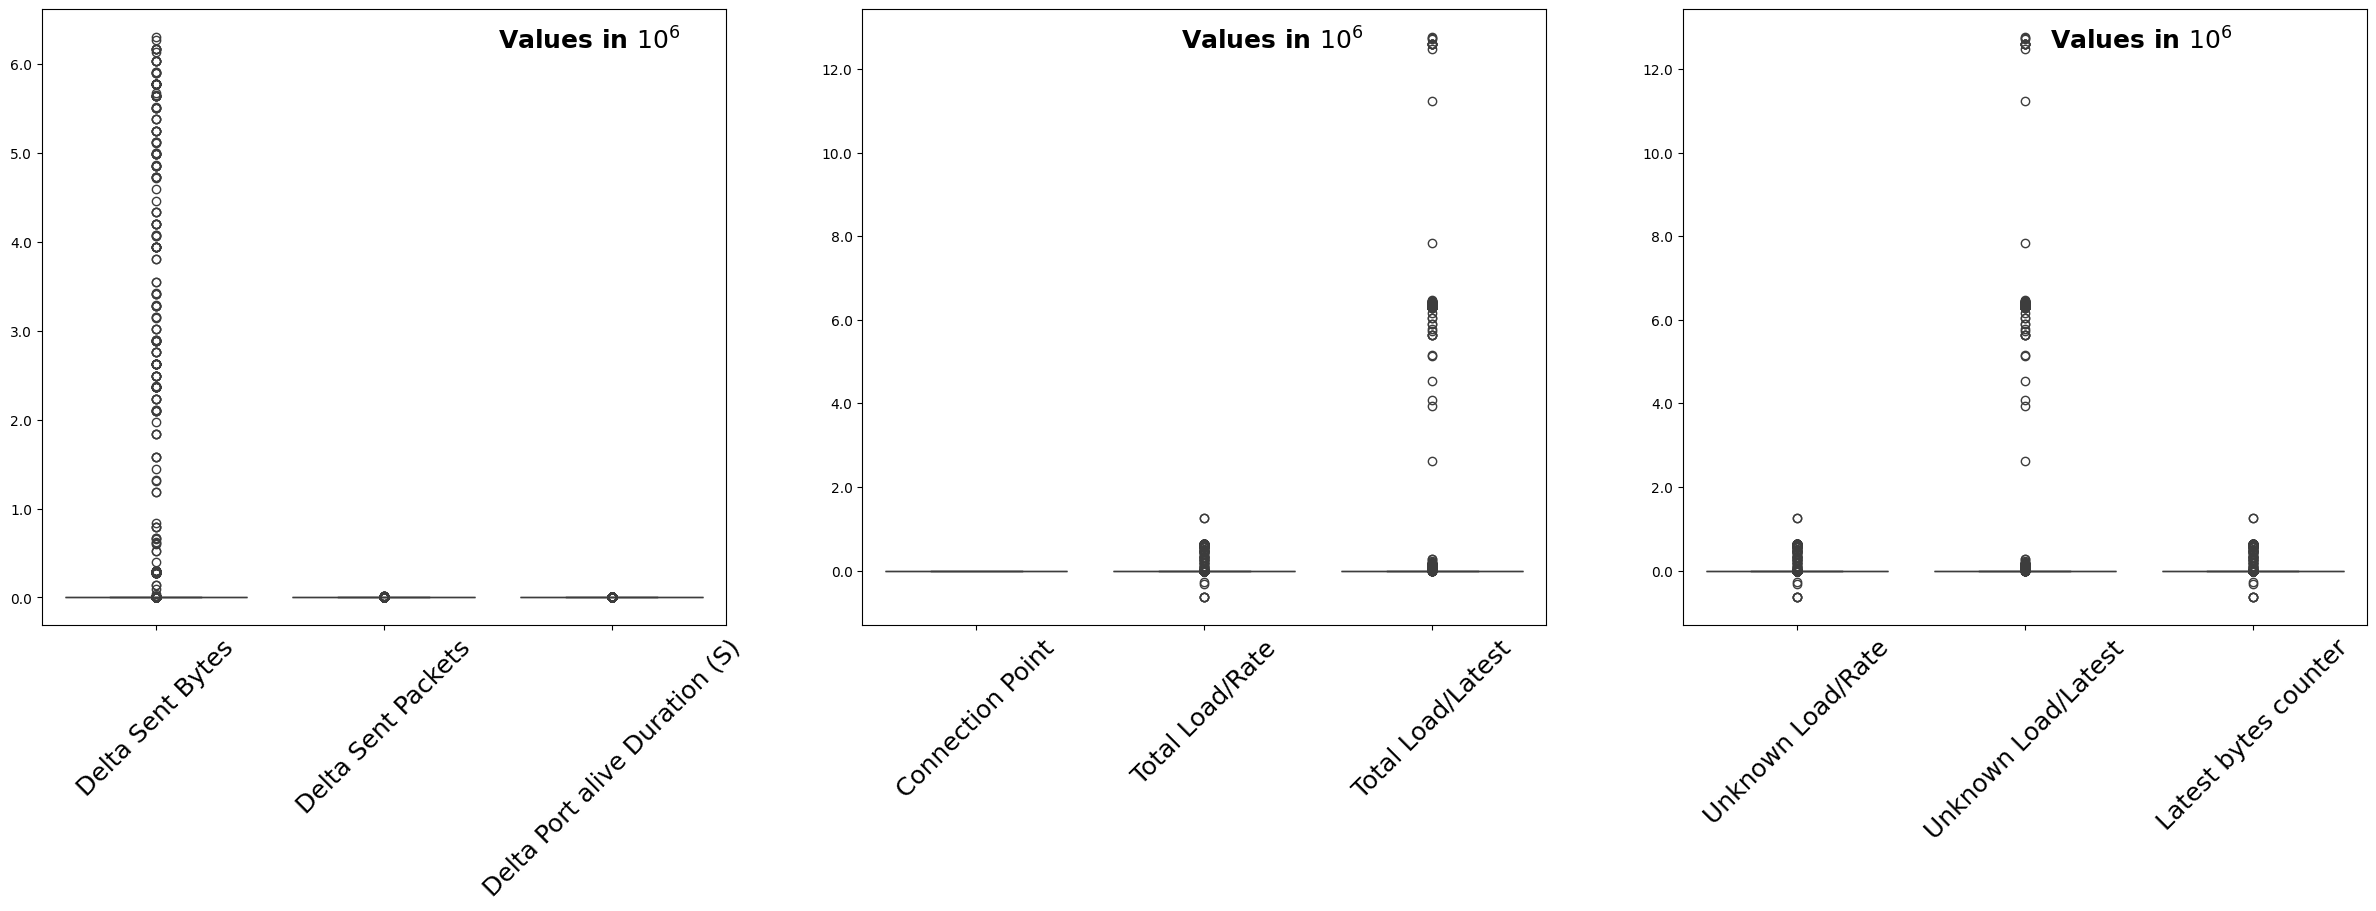

Unique labels in train data: ['TCP-SYN' 'Normal' 'PortScan' 'Overflow' 'Diversion' 'Blackhole']
Unique labels in validation data: ['Diversion' 'TCP-SYN' 'Blackhole' 'PortScan' 'Overflow' 'Normal']
Unique labels in test data: ['TCP-SYN' 'Normal' 'Blackhole' 'Diversion' 'PortScan' 'Overflow']

Fitting LabelEncoder on training labels...
Classes found by LabelEncoder: ['Blackhole' 'Diversion' 'Normal' 'Overflow' 'PortScan' 'TCP-SYN']

Encoding labels for train, validation, and test datasets...

Encoded Train Labels (first 10): [5 5 2 4 3 2 5 1 5 4]
Encoded Validation Labels (first 10): [1 5 0 4 0 4 4 3 0 0]
Encoded Test Labels (first 10): [5 2 5 0 5 0 5 5 1 4]

Processing features for the train dataset...
Train features (numeric): (2619, 19)
Train features (categorical): (2619, 2)

Encoding categorical features in train data...

Combined train features (before scaling):
    Received Packets  Received Bytes  Sent Bytes  Sent Packets  \
0               240           16586    12622603        

C:\Users\Monet\AppData\Local\Temp\ipykernel_21060\1413796941.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


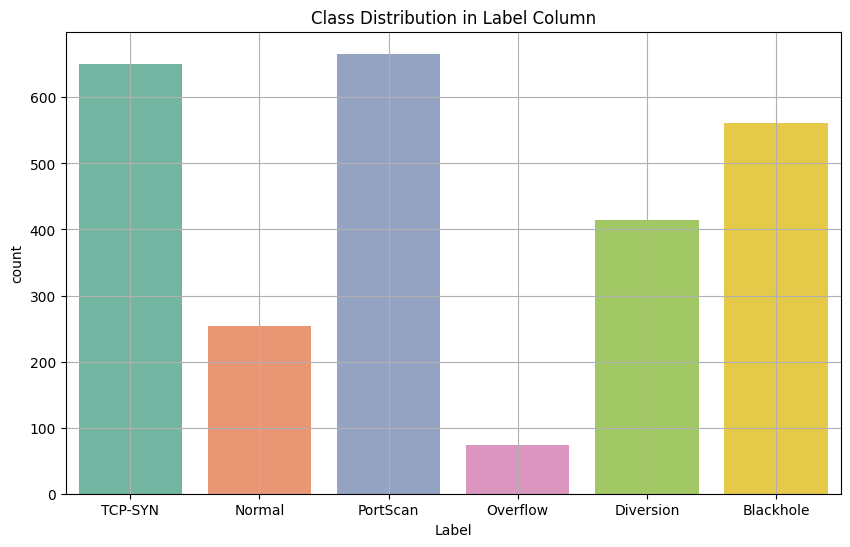

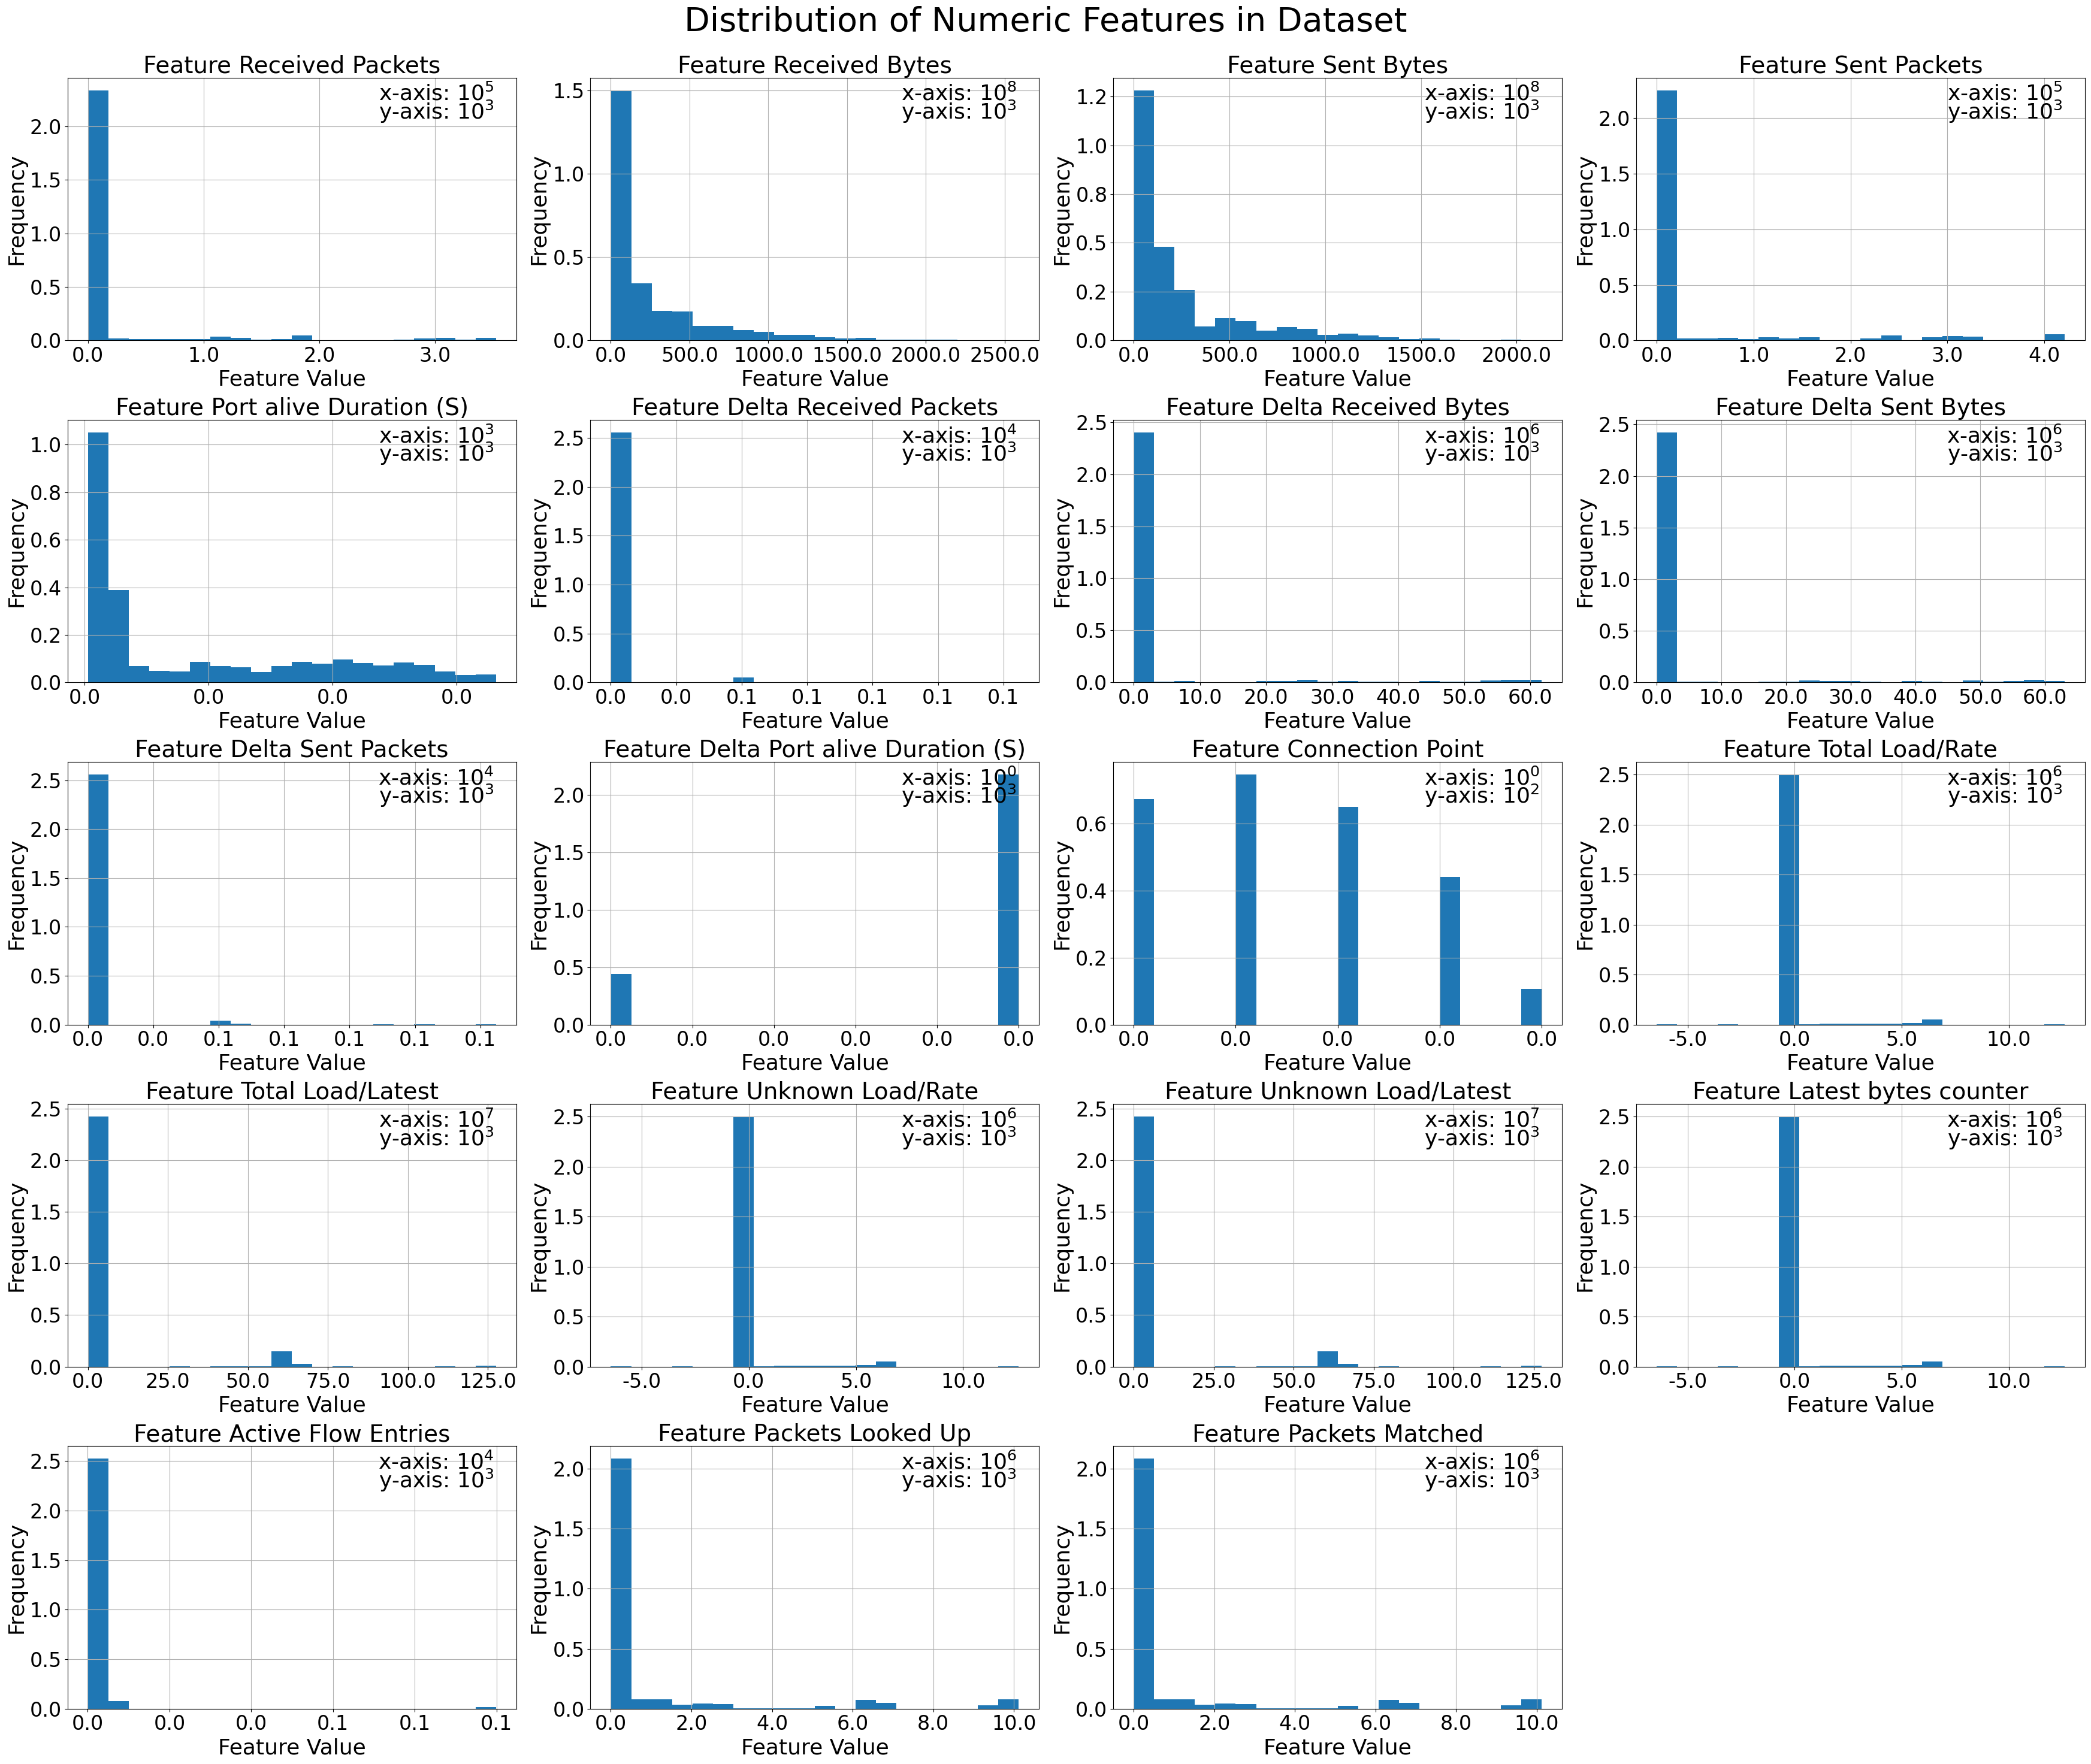

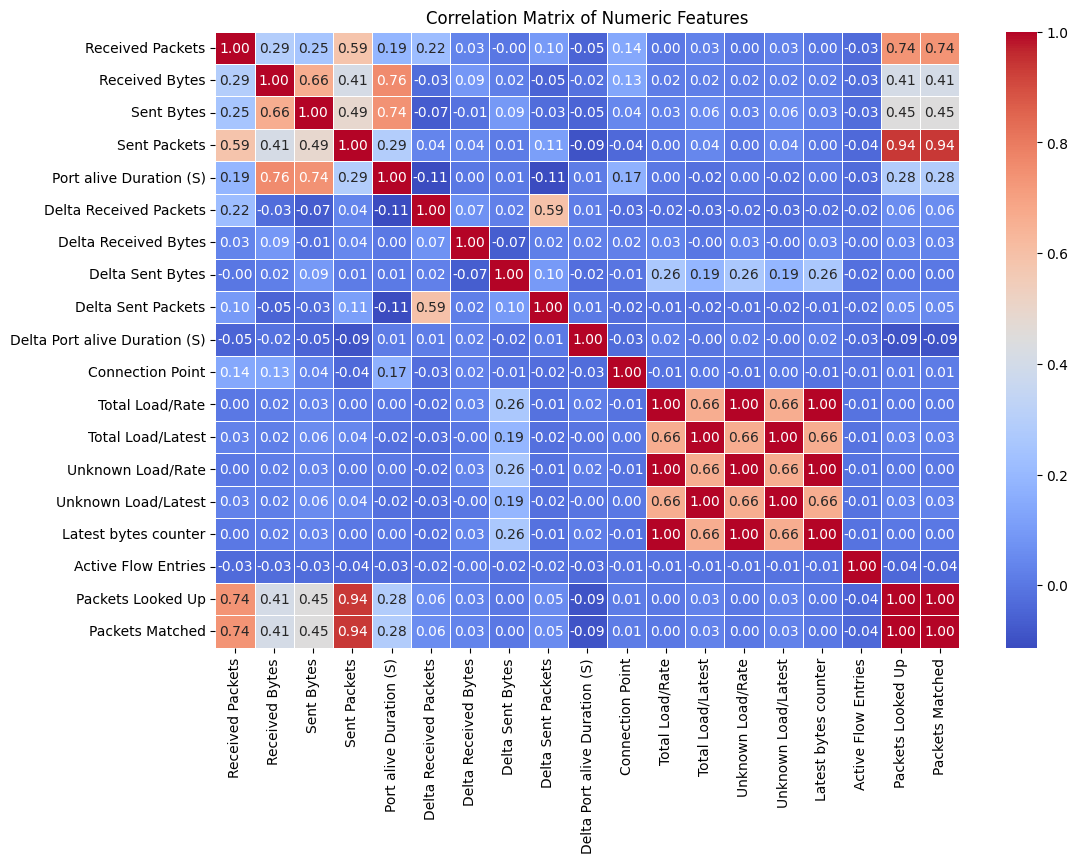

In [ ]:
import import_ipynb
%run UNR-IDD_data_preprocessing.ipynb

In [5]:
import os
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Save reports
output_dir = r"./report/"
os.makedirs(output_dir, exist_ok=True)

# Traditional statistical methods
def t_test(X_train, X_val, y_train, y_val):
    t_stat, p_value = stats.ttest_ind(y_train, y_val)
    return p_value

def anova(X_train, X_val, y_train, y_val):
    f_stat, p_value = stats.f_oneway(y_train, y_val)
    return p_value

def linear_regression(X_train, X_val, y_train, y_val):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    return mse

def multiple_regression(X_train, X_val, y_train, y_val):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    return mse

def f_test(X_train, X_val, y_train, y_val):
    model1 = LinearRegression().fit(X_train, y_train)
    model2 = LinearRegression().fit(X_val, y_val)
    rss1 = np.sum((y_train - model1.predict(X_train)) ** 2)
    rss2 = np.sum((y_val - model2.predict(X_val)) ** 2)
    f_stat = (rss1 - rss2) / rss2
    p_value = 1 - stats.f.cdf(f_stat, len(X_train) - 1, len(X_val) - 1)
    return p_value

def mann_whitney_u(X_train, X_val, y_train, y_val):
    u_stat, p_value = stats.mannwhitneyu(y_train, y_val)
    return p_value

def pca(X_train, X_val, y_train, y_val):
    # Apply PCA and return the explained variance ratio
    pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)
    return pca.explained_variance_ratio_

def tsne(X_train, X_val, y_train, y_val):
    # Apply t-SNE for dimensionality reduction
    tsne = TSNE(n_components=2, random_state=42)
    X_train_tsne = tsne.fit_transform(X_train)
    X_val_tsne = tsne.fit_transform(X_val)
    return X_train_tsne, X_val_tsne

# List of traditional statistical methods
methods = {
    't-test': t_test,
    'ANOVA': anova,
    'Linear Regression': linear_regression,
    'Multiple Regression': multiple_regression,
    'F-Test': f_test,
    'Mann-Whitney U Test': mann_whitney_u,
    'PCA': pca,
    't-SNE': tsne
}

# Store evaluation results for each method
results = []

# Standardize the data before applying PCA and t-SNE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train and evaluate each statistical method on the validation set
for name, method in methods.items():
    if name in ['Linear Regression', 'Multiple Regression']:
        # Apply linear regression and calculate mean squared error (MSE)
        mse = method(X_train_scaled, X_val_scaled, y_train, y_val)
        results.append({
            'Model': name,
            'Validation MSE': mse
        })
    elif name in ['PCA', 't-SNE']:
        # Apply PCA or t-SNE for dimensionality reduction and report explained variance
        if name == 'PCA':
            explained_variance = method(X_train_scaled, X_val_scaled, y_train, y_val)
            results.append({
                'Model': name,
                'Explained Variance Ratio': explained_variance
            })
        elif name == 't-SNE':
            # t-SNE returns transformed data; we'll just note this operation
            method(X_train_scaled, X_val_scaled, y_train, y_val)
            results.append({
                'Model': name,
                'Data after t-SNE': 'Transformed'
            })
    else:
        # Apply t-test, ANOVA, F-Test, Mann-Whitney U Test on the validation set
        p_value = method(X_train_scaled, X_val_scaled, y_train, y_val)
        results.append({
            'Model': name,
            'P-Value': p_value
        })

# Display the evaluation results
results_df = pd.DataFrame(results)
print("Model Evaluation on Validation Set:")
print(results_df)

# Save the validation set results
results_file = os.path.join(output_dir, 'statistical_method_validation_results.csv')
results_df.to_csv(results_file, index=False)
print(f"Validation set results saved to {results_file}")


Model Evaluation on Validation Set:
                 Model       P-Value  Validation MSE  \
0               t-test  4.547029e-02             NaN   
1                ANOVA  4.547029e-02             NaN   
2    Linear Regression           NaN        1.575211   
3  Multiple Regression           NaN        1.575211   
4               F-Test  1.110223e-16             NaN   
5  Mann-Whitney U Test  3.581589e-02             NaN   
6                  PCA           NaN             NaN   
7                t-SNE           NaN             NaN   

                    Explained Variance Ratio Data after t-SNE  
0                                        NaN              NaN  
1                                        NaN              NaN  
2                                        NaN              NaN  
3                                        NaN              NaN  
4                                        NaN              NaN  
5                                        NaN              NaN  
6  [0.20993

In [6]:
import pandas as pd
import os

results_df['Set'] = 'Validation'

print("\nCombined Results for Statistical Methods:")
print(results_df)

combined_results_file = os.path.join(output_dir, 'combined_statistical_method_results.csv')
results_df.to_csv(combined_results_file, index=False)
print(f"Combined results saved to {combined_results_file}")



Combined Results for Statistical Methods:
                 Model       P-Value  Validation MSE  \
0               t-test  4.547029e-02             NaN   
1                ANOVA  4.547029e-02             NaN   
2    Linear Regression           NaN        1.575211   
3  Multiple Regression           NaN        1.575211   
4               F-Test  1.110223e-16             NaN   
5  Mann-Whitney U Test  3.581589e-02             NaN   
6                  PCA           NaN             NaN   
7                t-SNE           NaN             NaN   

                    Explained Variance Ratio Data after t-SNE         Set  
0                                        NaN              NaN  Validation  
1                                        NaN              NaN  Validation  
2                                        NaN              NaN  Validation  
3                                        NaN              NaN  Validation  
4                                        NaN              NaN  Validatio

Explained Variance Ratio: [2.09937316e-01 2.00939402e-01 9.21575317e-02 6.69507654e-02
 5.35238970e-02 5.16982475e-02 4.92188365e-02 4.74957193e-02
 4.47636041e-02 4.40781302e-02 4.11471745e-02 3.49806270e-02
 2.31345037e-02 1.50302344e-02 1.40576260e-02 8.48822008e-03
 2.39816473e-03 3.11785090e-10 1.49492549e-17 0.00000000e+00
 0.00000000e+00]


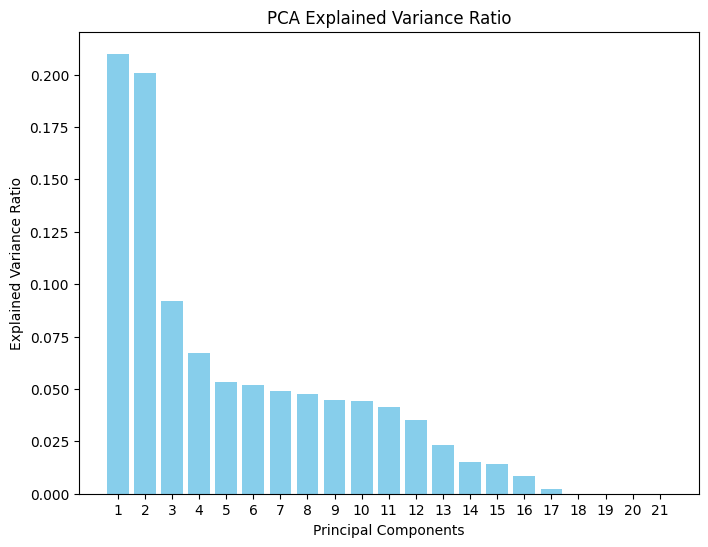

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def pca(X_train, X_val, y_train, y_val, n_components=None):
    if n_components is None:
        n_components = min(X_train.shape[1], X_val.shape[1])
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)
    return pca.explained_variance_ratio_

explained_variance = pca(X_train_scaled, X_val_scaled, y_train, y_val)

print("Explained Variance Ratio:", explained_variance)

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='skyblue')
plt.axhline(0, color='black',linewidth=0.5)  # 添加基线
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()


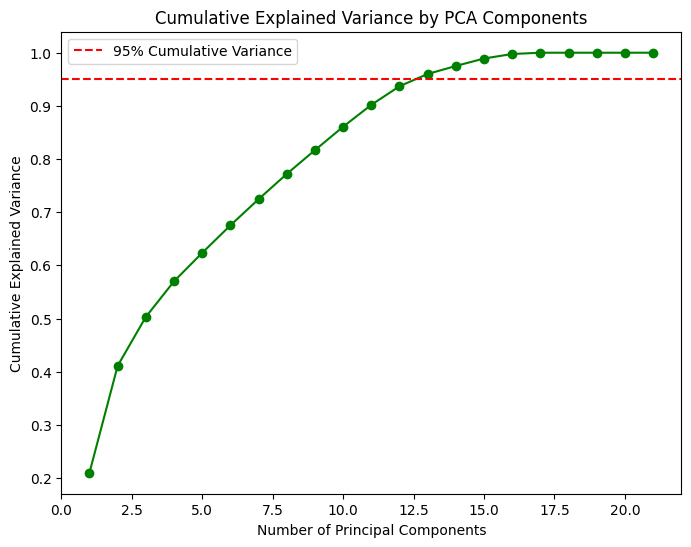

In [14]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, color='green', marker='o')
plt.axhline(0.95, color='red', linestyle='--', label='95% Cumulative Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.legend()
plt.show()


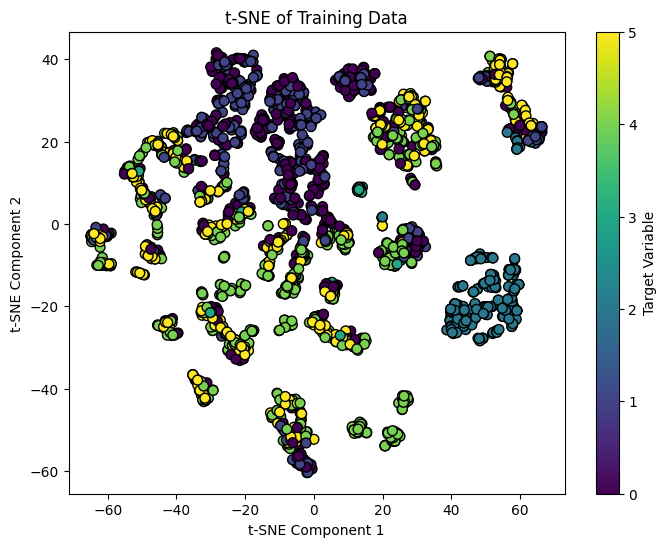

In [15]:
X_train_tsne, X_val_tsne = tsne(X_train_scaled, X_val_scaled, y_train, y_val)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.title("t-SNE of Training Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label='Target Variable')
plt.show()


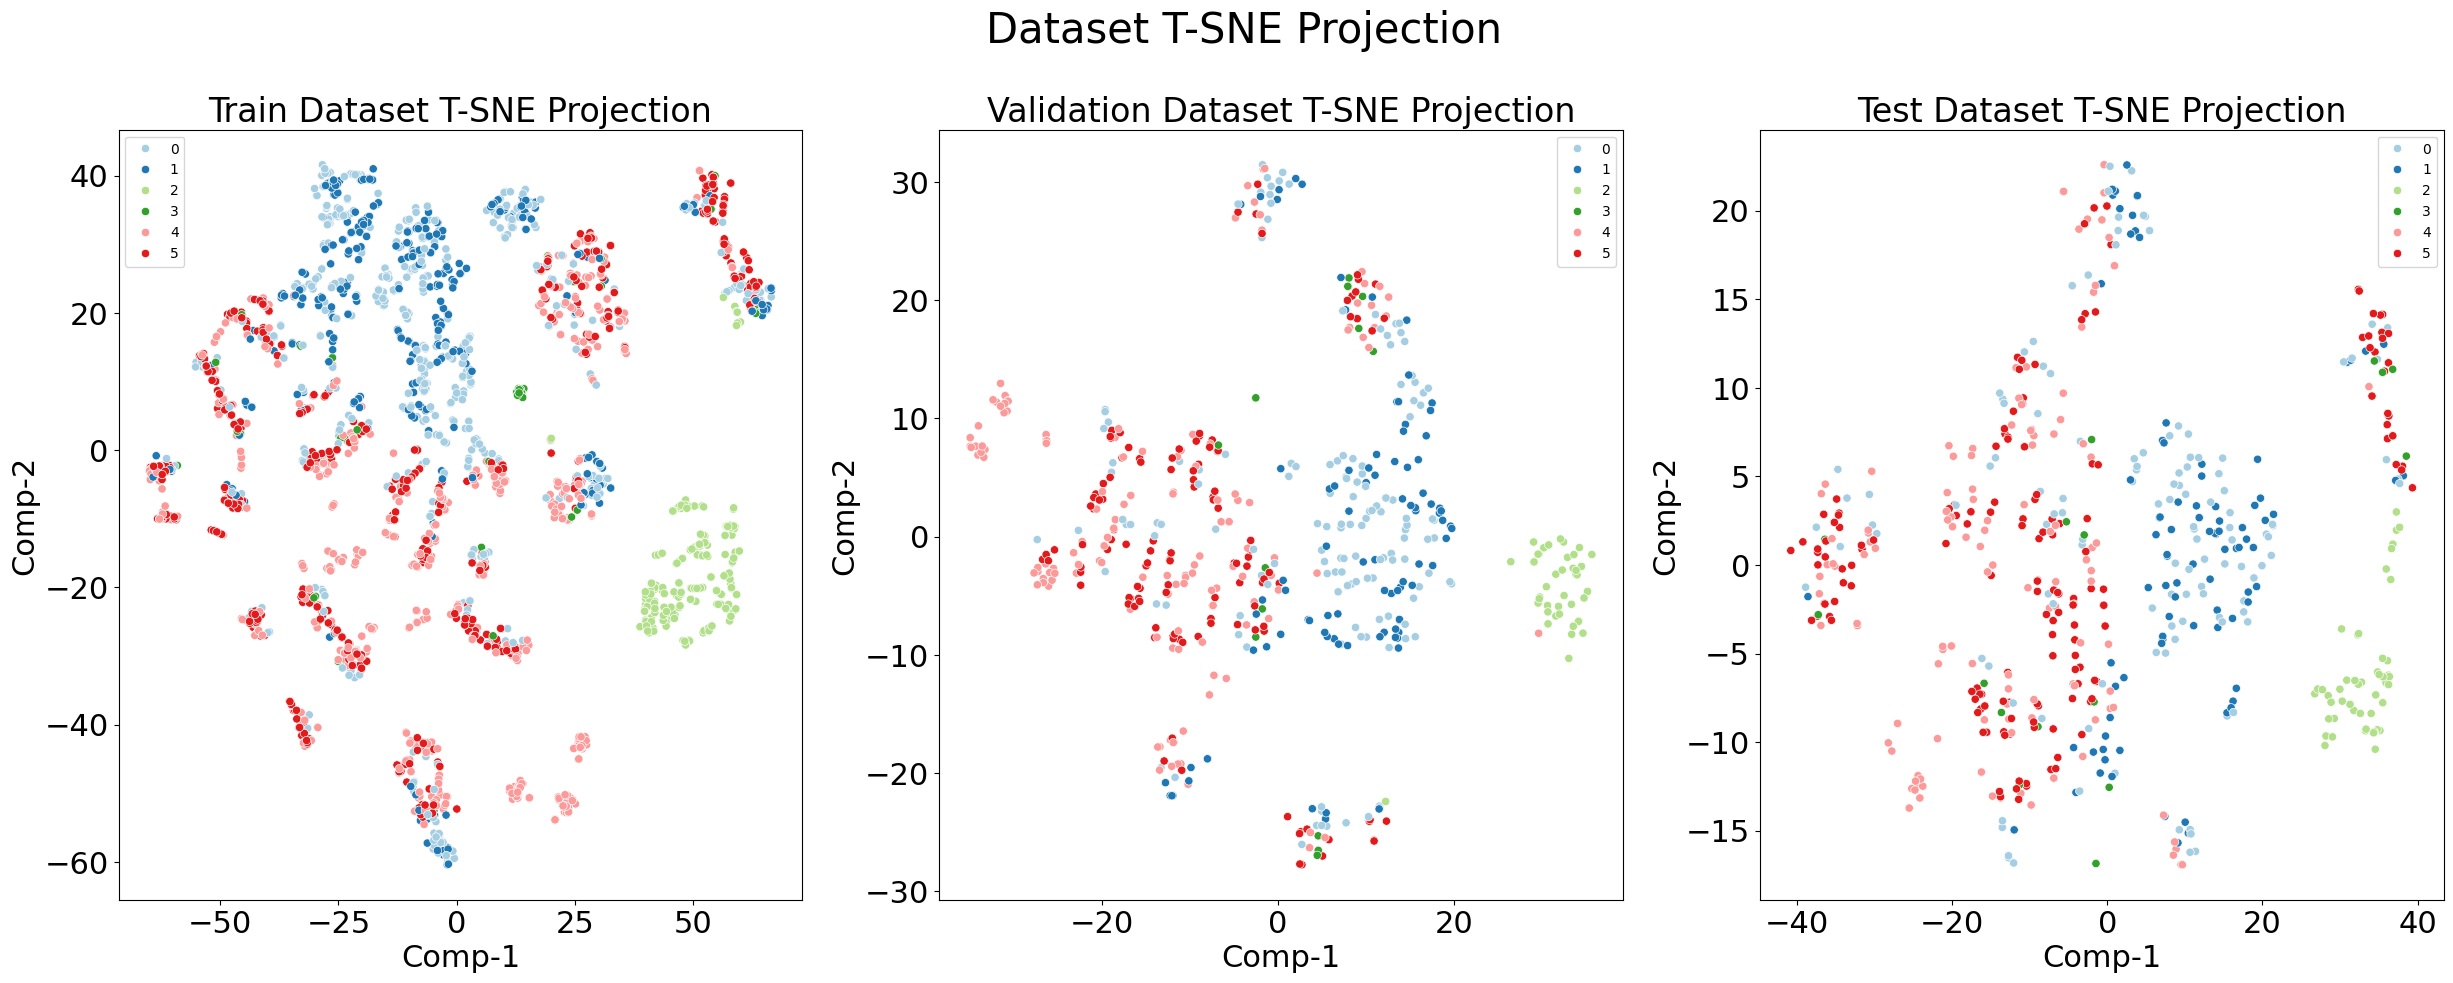

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def TSNE_visualizer(X):
    tsne = TSNE(n_components=2, random_state=42)
    return tsne.fit_transform(X)

t_sne_train = TSNE_visualizer(np.array(X_train, dtype='float'))
t_sne_val = TSNE_visualizer(np.array(X_val, dtype='float'))
t_sne_test = TSNE_visualizer(np.array(X_test, dtype='float'))

fig, axes = plt.subplots(1, 3, figsize=(30, 10))

titles = ["Train", "Validation", "Test"]
c = [y_train, y_val, y_test]

for i in range(3):
    ax = axes[i]
    t_sne_data = [t_sne_train, t_sne_val, t_sne_test][i]
    sns.scatterplot(x=t_sne_data[:, 0], y=t_sne_data[:, 1], hue=c[i], ax=ax, palette="Paired")
    ax.set_title(f"{titles[i]} Dataset T-SNE Projection", fontsize=24)
    ax.set_xlabel('Comp-1', fontsize=22)
    ax.set_ylabel('Comp-2', fontsize=22)
    ax.tick_params(axis='both', which='major', labelsize=22)

plt.suptitle('Dataset T-SNE Projection', size=30, y=1.0)
plt.savefig("Dataset_T_SNE_Projection.png")
plt.show()
